In [1]:

""" Simple linear regression example in TensorFlow
This program tries to predict the number of thefts from 
the number of fire in the city of Chicago
Author: Chip Huyen
Prepared for the class CS 20SI: "TensorFlow for Deep Learning Research"
cs20si.stanford.edu
"""
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import xlrd

import utils

DATA_FILE = 'data/fire_theft.xls'

# Step 1: read in data from the .xls file
book = xlrd.open_workbook(DATA_FILE, encoding_override="utf-8")
sheet = book.sheet_by_index(0)
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])
n_samples = sheet.nrows - 1

In [2]:
tf.reset_default_graph()

In [3]:
# Step 2: create placeholders for input X (number of fire) and label Y (number of theft)
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

# Step 3: create weight and bias, initialized to 0
w = tf.Variable(0, dtype= tf.float32, name='weights')
b = tf.Variable(0, dtype= tf.float32, name='bias')

# Step 4: build model to predict Y
Y_predicted = tf.add(X*w, b, name='Y_pred') 

# Step 5: use the square error as the loss function
loss = tf.reduce_sum(tf.square(Y - Y_predicted), name='loss')


# Step 6: using gradient descent with learning rate of 0.01 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)   ## lr = 0.01 is too big to converge


In [4]:
with tf.Session() as sess:
    # Step 7: initialize the necessary variables, in this case, w and b
    sess.run(tf.global_variables_initializer()) 
    
    writer = tf.summary.FileWriter('./my_graph', sess.graph)
    
    # Step 8: train the model
    for i in range(100): # train the model 100 epochs
        total_loss = 0
        for x, y in data:
            # Session runs train_op and fetch values of loss
            _, l = sess.run([optimizer, loss], feed_dict={X: x, Y:y}) 
            total_loss += l
        print('Epoch {0}: {1}'.format(i, total_loss/n_samples))

    # close the writer when you're done using it
    writer.close() 
    
    # Step 9: output the values of w and b
    w, b = sess.run([w, b]) 

Epoch 0: 2069.632077968724
Epoch 1: 2117.0124027045676
Epoch 2: 2092.302715009167
Epoch 3: 2068.508299712269
Epoch 4: 2045.59097691377
Epoch 5: 2023.51466578529
Epoch 6: 2002.2447984701112
Epoch 7: 1981.7480356388148
Epoch 8: 1961.9942731161912
Epoch 9: 1942.9520601381857
Epoch 10: 1924.5930879137345
Epoch 11: 1906.8898473151382
Epoch 12: 1889.8164801984317
Epoch 13: 1873.347572792144
Epoch 14: 1857.4589788810838
Epoch 15: 1842.1277029727187
Epoch 16: 1827.3322633700002
Epoch 17: 1813.052086790048
Epoch 18: 1799.2660774976082
Epoch 19: 1785.9562136753016
Epoch 20: 1773.1024838801738
Epoch 21: 1760.6891868668124
Epoch 22: 1748.6984040662203
Epoch 23: 1737.1138700809595
Epoch 24: 1725.9208882119883
Epoch 25: 1715.1045996287653
Epoch 26: 1704.6503852187864
Epoch 27: 1694.5447281878164
Epoch 28: 1684.774640512564
Epoch 29: 1675.3281234368194
Epoch 30: 1666.1934701423827
Epoch 31: 1657.35837137096
Epoch 32: 1648.8119148027063
Epoch 33: 1640.5438601484611
Epoch 34: 1632.5446351634428
Epoch 3

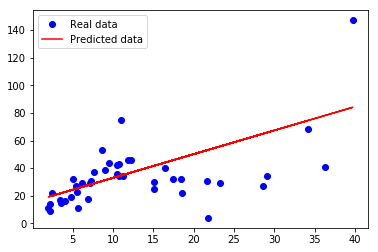

In [5]:
# plot the results
X, Y = data.T[0], data.T[1]
plt.plot(X, Y, 'bo', label='Real data')
plt.plot(X, X * w + b, 'r', label='Predicted data')
plt.legend()
plt.show()

In [62]:
tf.reset_default_graph()

In [63]:
# Step 2: create placeholders for input X (number of fire) and label Y (number of theft)
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

# Step 3: create weight and bias, initialized to 0
w = tf.Variable(0, dtype= tf.float32, name='weights_1')
u = tf.Variable(0, dtype= tf.float32, name='weights_2')
b = tf.Variable(0, dtype= tf.float32, name='bias')

# Step 4: build model to predict Y
Y_predicted = X * X * w + X * u +b

# Step 5: use the square error as the loss function
loss = tf.reduce_sum(tf.square(Y - Y_predicted), name='loss')


# Step 6: using gradient descent with learning rate of 0.01 to minimize loss
optimizer = tf.train.AdamOptimizer(learning_rate=0.01).minimize(loss)  
## GradientDescentOptimizer dont converge

In [64]:
with tf.Session() as sess:
    # Step 7: initialize the necessary variables, in this case, w and b
    sess.run(tf.global_variables_initializer()) 
    
    writer = tf.summary.FileWriter('./my_graph', sess.graph)
    
    # Step 8: train the model
    for i in range(10): # train the model 100 epochs
        total_loss = 0
        for x, y in data:
            # Session runs train_op and fetch values of loss
            _, l = sess.run([optimizer, loss], feed_dict={X: x, Y:y}) 
            total_loss += l
        print('Epoch {0}: {1}'.format(i, total_loss/n_samples))

    # close the writer when you're done using it
    writer.close() 
    
    # Step 9: output the values of w and b
    w,u, b = sess.run([w, u, b]) 

Epoch 0: 810.4471694401333
Epoch 1: 722.6876044784274
Epoch 2: 699.244873943783
Epoch 3: 679.9539763359796
Epoch 4: 663.1458480925787
Epoch 5: 647.5723329271589
Epoch 6: 633.1984935260955
Epoch 7: 619.9250605219886
Epoch 8: 607.6653153328668
Epoch 9: 596.3391474088033


In [65]:
w

0.044176158

In [66]:
u

0.69172853

In [67]:
b

2.1479712

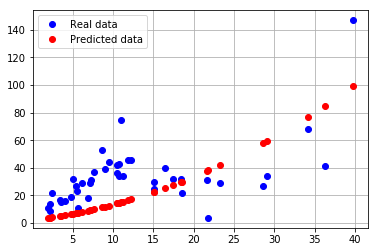

In [71]:
# plot the results
X, Y = data.T[0], data.T[1]
plt.plot(X, Y, 'bo', label='Real data')
plt.plot(X, X * X * w + X * u +b, 'ro', label='Predicted data')
plt.legend()
plt.grid()
plt.show()